<a href="https://colab.research.google.com/github/Daprosero/ProcesamientoImagenes2025/blob/main/3.Tareas%20cl%C3%A1sicas%20de%20visi%C3%B3n%20por%20computador/1_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://medellin.unal.edu.co/eventos/panam2018/images/imagenes/organizan_2.png" width="40%">

# Procesamiento Digital de Imágenes

## Departamento de ingeniería eléctrica, electrónica y computación
## Sede Manizales

### Profesores Diego Pérez

###  ¿Qué es la clasificación de imágenes?

La clasificación de imágenes es una tarea de visión por computadora cuyo objetivo es asignar una etiqueta o clase a una imagen completa. El modelo aprende patrones visuales a partir de los datos de entrenamiento.

#### Ejemplos comunes:
- Clasificar entre "perro" o "gato"
- Distinguir tipos de células en medicina
- Identificar si un producto está dañado

In [1]:
#Packages:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

#Packages from optimizing the model:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape #I have 50000 images of train where every one have resolution of 32x32 and is in RGB space color

(50000, 32, 32, 3)

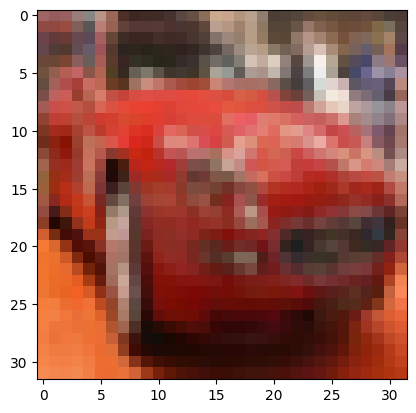

In [4]:
#Painting a image:
plt.imshow(x_train[5])

#Red neuronal:

In [5]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")/255

In [6]:
len(np.unique(y_train)) #I have only 10 classes

10

In [7]:
#Binarizing the labels:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [9]:
#Normalizing the data lessing the mean and the standard desviation to every data (This stayes the data between 0 and 1):
mean=np.mean(x_train)
sd=np.std(x_train)
#I add a very samll number in the denominator for if the sd=0
x_train=(x_train-mean)/(sd+1e-7)
x_test=(x_test-mean)/(sd+1e-7) #IU normalize with the mean and the sd of the train set because the idea is that the network doesn´t know these parameters of the test set

In [10]:
#Train_test_val_split:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((45000, 32, 32, 3), (45000, 10), (5000, 32, 32, 3), (5000, 10))

#Data Augmentation:

In [11]:
datagen=ImageDataGenerator(rotation_range=15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=True
                   )

#Building the model

In [12]:
base_filtros=32 #Number of Kernels in the convolutional layers
w_regularizer=1e-4 #weight of the relularizer

In [13]:
from tensorflow.keras import Model, layers, regularizers
model=Sequential()

#First convolution layer:
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer), input_shape=(32,32,3))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(BatchNormalization()) #BatchNormalization Layer

#Second convolution layer:
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu OR SIMPLY I COULD PUT A ACTIVATION FUNCTION IN THE CONVOLUTIONAL LAYER
model.add(BatchNormalization()) #BatchNormalization Layer
model.add(MaxPooling2D(pool_size=(2,2))) #First MaxPooling Layer
model.add(Dropout(0.2))


#Convolution layer number 3 (Iqual but increase the number of kernels):
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(BatchNormalization()) #BatchNormalization Layer
model.add(Dropout(0.2))


#Convolution layer number 4:
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(BatchNormalization()) #BatchNormalization Layer
model.add(MaxPooling2D(pool_size=(2,2))) #Second MaxPooling Layer
model.add(Dropout(0.3))



#Convolution layer number 5 (increase the number of kernels):
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(BatchNormalization()) #BatchNormalization Layer

#Convolution layer number 6:
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(BatchNormalization()) #BatchNormalization Layer
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling Layer Number three
model.add(Dropout(0.4))

#Classifiation (with dense layer) and Flatten:
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#architecture of the model:
model.summary() #Efectly the convolution layers increase the depth of my tensor and the pooling layer decrease the resolution of my tensor

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [15]:
#Compile the model:
model.compile(metrics=["accuracy"],loss="categorical_crossentropy",optimizer=optimizers.Adam())

In [16]:
#Define the checkpoint:
checkpoint=ModelCheckpoint("best_model.keras",verbose=1,save_best_only=True,monitor="val_accuracy")

In [18]:
#Training the model including the data augmentation and a checkpoint:
history=model.fit(datagen.flow(x_train,y_train,batch_size=128),callbacks=[checkpoint],steps_per_epoch=x_train.shape[0]//128,epochs=10,validation_data=(x_valid,y_valid),verbose=2)

Epoch 1/10

Epoch 1: val_accuracy did not improve from 0.53080
351/351 - 24s - 69ms/step - accuracy: 0.5532 - loss: 1.3771 - val_accuracy: 0.5120 - val_loss: 1.5681
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.53080
351/351 - 1s - 2ms/step - accuracy: 0.6016 - loss: 1.3435 - val_accuracy: 0.5124 - val_loss: 1.5410
Epoch 3/10

Epoch 3: val_accuracy improved from 0.53080 to 0.59320, saving model to best_model.keras
351/351 - 25s - 70ms/step - accuracy: 0.5812 - loss: 1.2806 - val_accuracy: 0.5932 - val_loss: 1.3035
Epoch 4/10

Epoch 4: val_accuracy improved from 0.59320 to 0.59640, saving model to best_model.keras
351/351 - 1s - 2ms/step - accuracy: 0.6094 - loss: 1.1691 - val_accuracy: 0.5964 - val_loss: 1.2869
Epoch 5/10

Epoch 5: val_accuracy improved from 0.59640 to 0.62800, saving model to best_model.keras
351/351 - 24s - 68ms/step - accuracy: 0.5987 - loss: 1.2275 - val_accuracy: 0.6280 - val_loss: 1.1742
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.62800
35

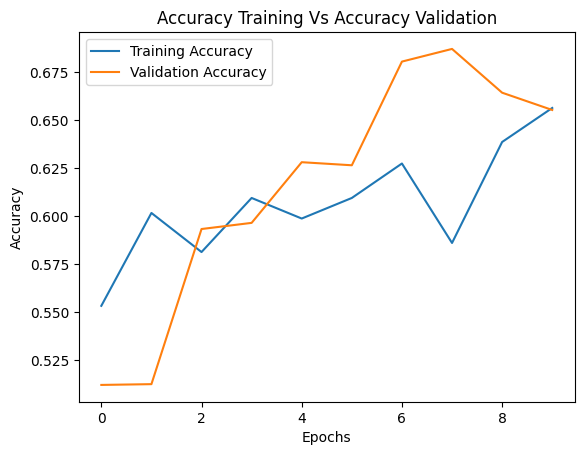

In [19]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

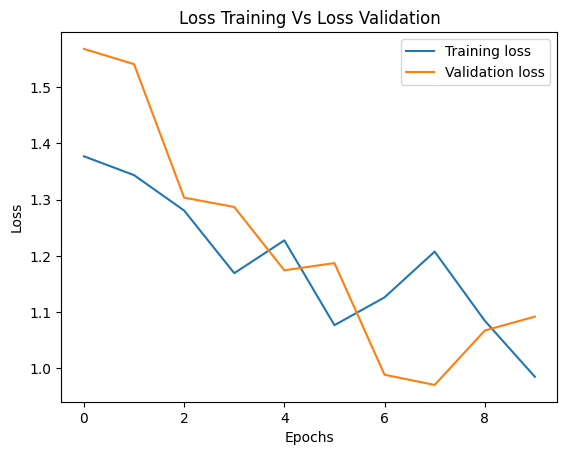

In [20]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [21]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0987 - loss: 3.1807


[3.187410593032837, 0.10000000149011612]

#  ¿Qué es ResNet?
[ResNet](https://medium.com/@siddheshb008/resnet-architecture-explained-47309ea9283d) (Redes Residuales) introduce conexiones residuales que permiten entrenar redes muy profundas evitando el problema de desvanecimiento del gradiente. Fue propuesta por Microsoft en 2015 y ganó el ILSVRC.
<img src="https://miro.medium.com/v2/resize:fit:850/1*C8jf92MeHZnxnbpMkz6jkQ.png" width="100%">

In [25]:
x_train.shape

(45000, 32, 32, 3)

In [30]:

import tensorflow as tf
# Usar ResNet50 con pesos preentrenados
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model_resnet = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model_resnet.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history=model_resnet.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.3068 - loss: 1.9515 - val_accuracy: 0.1003 - val_loss: 3.6501
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.4149 - loss: 1.6541 - val_accuracy: 0.1000 - val_loss: 3.9541
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4401 - loss: 1.5981 - val_accuracy: 0.1000 - val_loss: 4.3797


In [31]:
model_resnet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,649,184 (90.21 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 40,982 (160.09 KB)

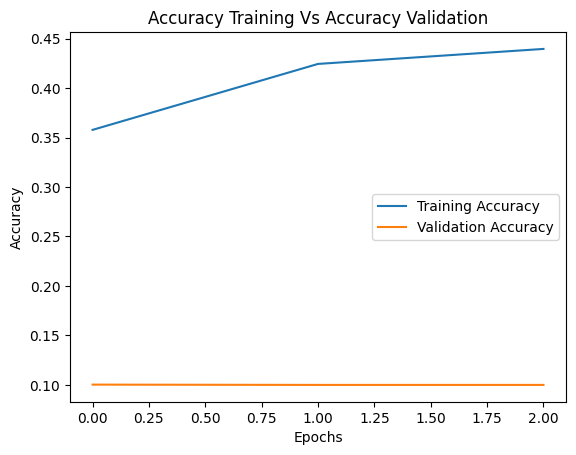

In [32]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

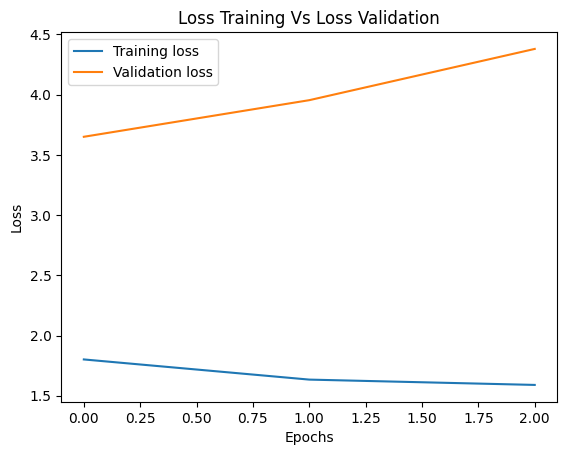

In [33]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [34]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0987 - loss: 3.1807


[3.187410593032837, 0.10000000149011612]

# ¿Qué es EfficientNet?
EfficientNet escala eficientemente la profundidad, ancho y resolución de la red mediante un método compuesto, [ver](https://medium.com/data-science/complete-architectural-details-of-all-efficientnet-models-5fd5b736142). Ofrece alta precisión con menos parámetros.
<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*rnhgFRXetwD8PvxhZIpwIA.png" width="100%">

In [35]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model_eff = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model_eff.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model_eff.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))




16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.1514 - loss: 2.2557 - val_accuracy: 0.1000 - val_loss: 2.4897
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2144 - loss: 2.1340 - val_accuracy: 0.1000 - val_loss: 2.5947
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.2386 - loss: 2.0851 - val_accuracy: 0.1000 - val_loss: 2.7158


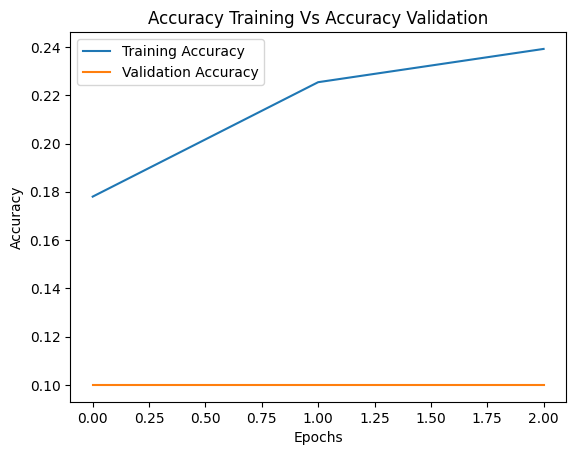

In [36]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

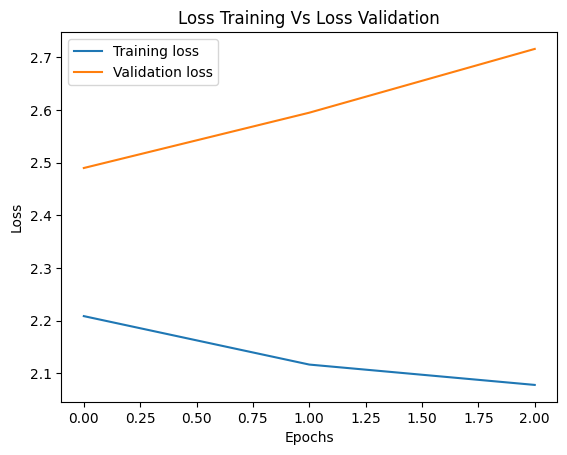

In [37]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [38]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0987 - loss: 3.1807


[3.187410593032837, 0.10000000149011612]

#¿Qué es VGG?
[VGG](https://medium.com/@siddheshb008/vgg-net-architecture-explained-71179310050f)
 es una arquitectura simple compuesta por bloques de convoluciones 3x3 con capas de pooling intercaladas. Es profunda pero fácil de entender.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*B_ZaaaBg2njhp8SThjCufA.png" width="100%">

In [39]:

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model_vgg = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model_vgg.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4682 - loss: 1.5464 - val_accuracy: 0.1000 - val_loss: 3.0045
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6284 - loss: 1.0861 - val_accuracy: 0.1000 - val_loss: 3.0200
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6489 - loss: 1.0246 - val_accuracy: 0.1000 - val_loss: 3.0203


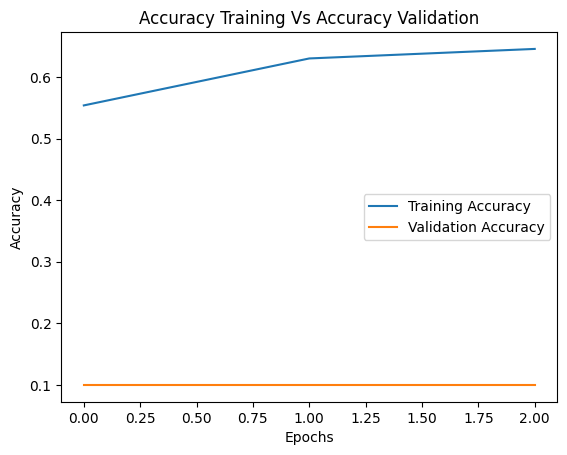

In [40]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

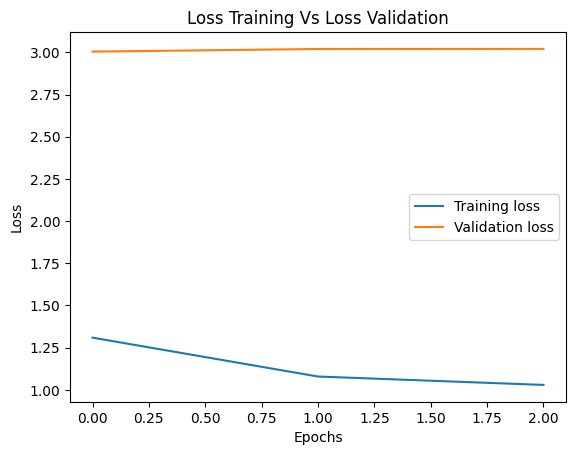

In [41]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [42]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0987 - loss: 3.1807


[3.187410593032837, 0.10000000149011612]

# ¿Qué es MobileNet?
[MobileNet](https://medium.com/@pandrii000/mobilenet-architectures-17fe7406d794) está optimizado para dispositivos móviles. Usa convoluciones separables en profundidad (depthwise separable convolutions) para reducir el costo computacional.
<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*OghXrmqLYrPExgNF85BZCg.png" width="100%">



In [43]:

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model_mob = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model_mob.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model_mob.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

/tmp/ipython-input-43-583989433.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.1933 - loss: 2.2080 - val_accuracy: 0.1000 - val_loss: 2.9312
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2328 - loss: 2.1015 - val_accuracy: 0.1000 - val_loss: 3.4803
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2389 - loss: 2.0780 - val_accuracy: 0.1002 - val_loss: 3.8270


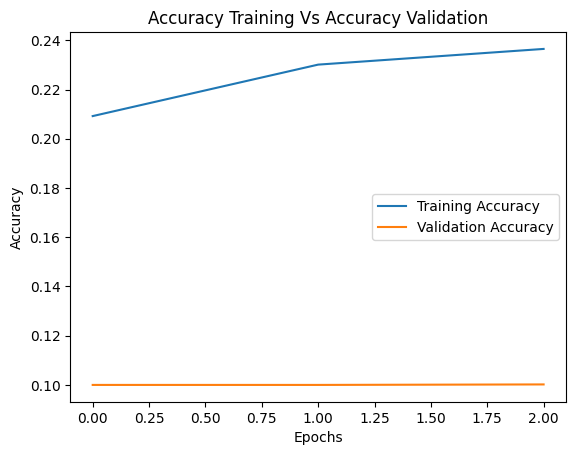

In [44]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

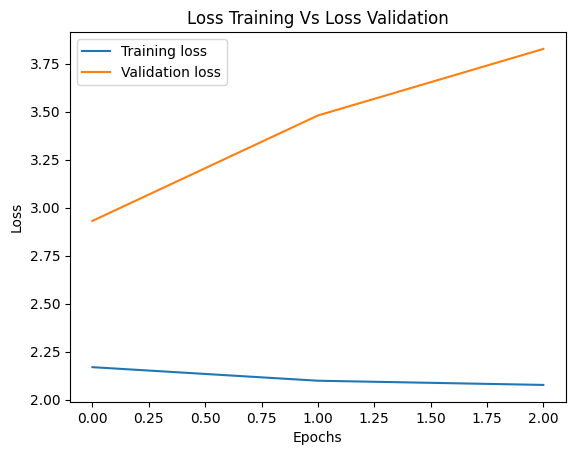

In [45]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [46]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0987 - loss: 3.1807


[3.187410593032837, 0.10000000149011612]